In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize

In [2]:
df = pd.read_csv("file.csv")

In [3]:
# jpy/usd e hkd/usd dataset
df_hkd = pd.read_csv("HKDUSD=X.csv")
df_jpy = pd.read_csv("JPYUSD=X.csv")

In [4]:
df['HSI'] = (df['HSI']*df_hkd['Close'].mean())
df['N225'] = (df['N225']*df_jpy['Close'].mean()) 

In [5]:
df_hkd['Close'].mean()

0.12826727803379417

In [6]:
#close price in USD
df.head()

,Date,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
0,2016-01-01,0.948024,434.33,0.005955,3.51,0.001748,562.00,1060.2,2810.900488,174.137258,2035.4,32.96,2.87
1,2016-01-02,0.937124,433.44,0.006065,3.50,0.001741,562.00,1060.2,2810.900488,174.137258,2035.4,32.96,2.87
2,2016-01-03,0.971905,430.01,0.006017,3.48,0.001744,562.00,1060.2,2810.900488,174.137258,2035.4,32.96,2.87
3,2016-01-04,0.954480,433.09,0.005958,3.50,0.001748,544.20,1075.2,2735.571521,168.805923,2009.1,32.37,2.77
4,2016-01-05,0.950176,431.96,0.006044,3.47,0.001721,535.75,1078.4,2717.819530,168.101637,2011.7,32.89,2.75


In [7]:
# no missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   ETH        1827 non-null   float64
 2   BTC        1827 non-null   float64
 3   XRP        1827 non-null   float64
 4   LTC        1827 non-null   float64
 5   XLM        1827 non-null   float64
 6   Palladium  1827 non-null   float64
 7   Gold       1827 non-null   float64
 8   HSI        1827 non-null   float64
 9   N225       1827 non-null   float64
 10  SP500      1827 non-null   float64
 11  NVIDIA     1827 non-null   float64
 12  AMD        1827 non-null   float64
dtypes: float64(12), object(1)
memory usage: 185.7+ KB


In [8]:
df.shape

(1827, 13)

In [9]:
df.describe()

,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,241.212440,6131.373196,0.288848,57.071834,0.097929,1239.691653,1391.137110,3318.197669,189.920928,2680.780460,200.687849,26.026719
std,231.644267,4732.385630,0.327973,53.838674,0.117155,573.601789,218.590348,395.589216,22.991069,424.863272,127.314333,22.978505
min,0.937124,364.330000,0.005112,3.000000,0.001444,469.800000,1060.200000,2349.802671,136.794327,1824.500000,25.220000,1.800000
25%,46.590000,1187.840000,0.025938,7.360000,0.002868,788.400000,1251.700000,3046.919920,176.410283,2359.600000,107.930000,10.920000
50%,194.870000,6416.310000,0.246065,48.210000,0.067262,1015.200000,1302.900000,3351.614956,194.650973,2711.100000,179.740000,16.270000
75%,324.655000,9218.810000,0.335255,73.490000,0.122353,1619.100000,1487.800000,3615.580747,206.710206,2941.300000,247.955000,32.720000
max,1396.420000,29001.720000,3.380000,358.340000,0.896227,2711.700000,2069.400000,4252.588868,252.217874,3712.800000,582.480000,97.120000


Descrizione del dataset

In [10]:
counts = []
for col in df.columns:
    na_count = df[df[col].isna()].shape[0]
    counts.append(na_count)

pd.DataFrame(counts, index=df.columns, columns=['NA'])

,NA
Date,0
ETH,0
BTC,0
XRP,0
LTC,0
XLM,0
Palladium,0
Gold,0
HSI,0
N225,0


Check per vedere se sono presenti dati mancanti


# Prepocessing : trasformazione del tipo di dati


In [11]:
df.dtypes

Date          object
ETH          float64
BTC          float64
XRP          float64
LTC          float64
XLM          float64
Palladium    float64
Gold         float64
HSI          float64
N225         float64
SP500        float64
NVIDIA       float64
AMD          float64
dtype: object

In [12]:
df['Date'] = pd.to_datetime(df['Date'],format = "%Y-%m-%d")

In [13]:
#df.dtypes

## Grafici preliminari


<AxesSubplot:>

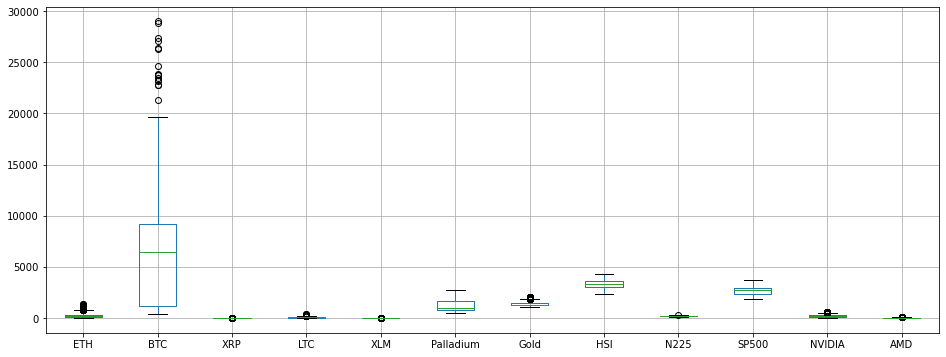

In [14]:
df.boxplot(figsize=(16,6))

In [15]:
#copia del dataset
newdf = df.copy()

In [16]:
#uso le date come index
newdf.set_index('Date', inplace=True)

In [17]:
df_cryptocurrencies = newdf[['ETH','BTC','XRP','LTC','XLM']]
df_commodities = newdf[['Palladium','BTC','Gold']]
df_financial_indexes = newdf[['HSI','BTC','N225','SP500']]
df_stock_data = newdf[['NVIDIA','BTC','AMD']]

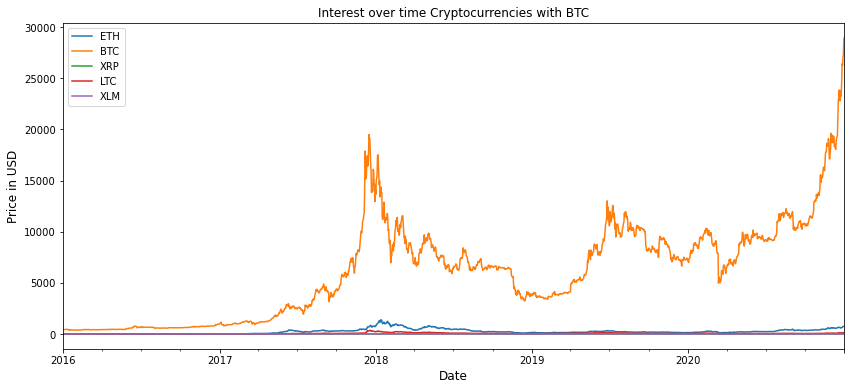

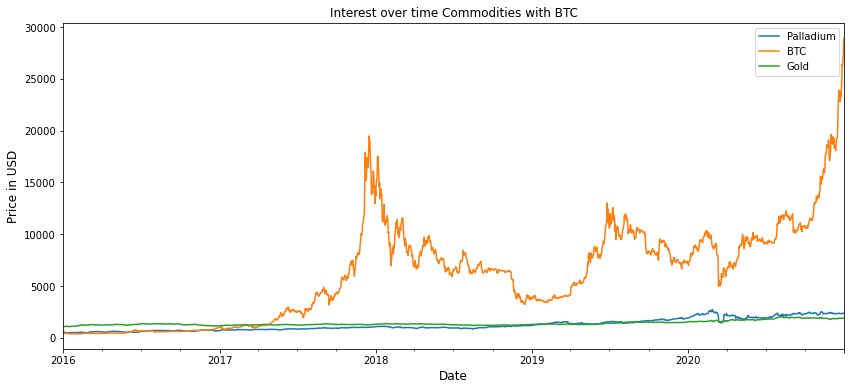

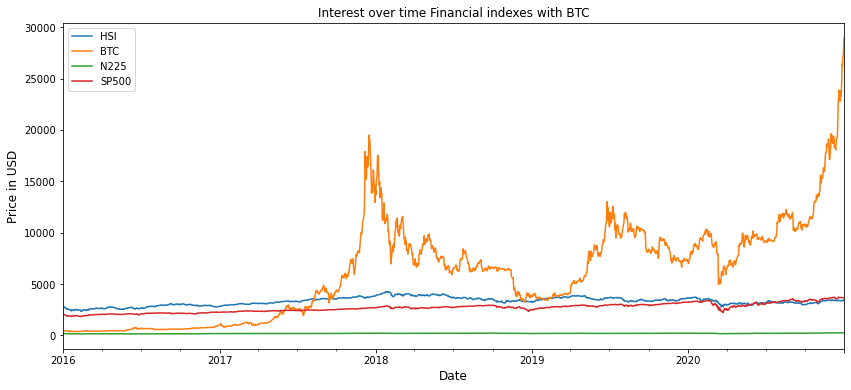

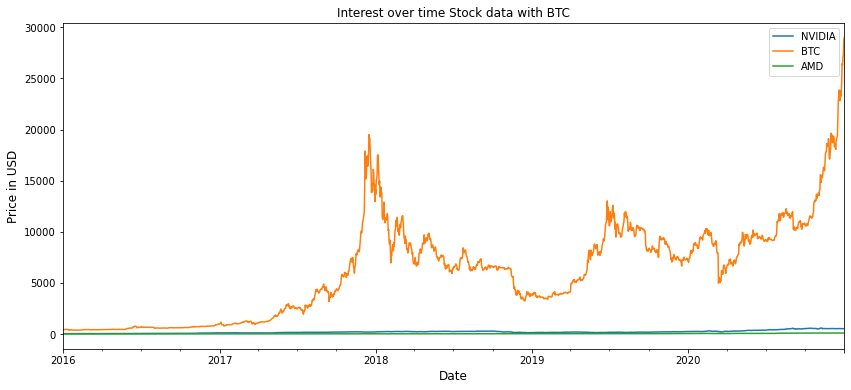

In [18]:
list1 = [df_cryptocurrencies,df_commodities,df_financial_indexes,df_stock_data]
list_name = ['Cryptocurrencies', 'Commodities', 'Financial indexes', 'Stock data']
for i in range(len(list1)):
    
    list1[i].plot(figsize=(14,6))
#df_commodities.plot(figsize=(14,6))
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Price in USD', fontsize=12)
    plt.title('Interest over time '+ list_name[i] + ' with BTC');

# Technical Indicator

### Simple Moving Average (SMA)

A simple moving average smooths out volatility and makes it easier to view the price trend of a security. If the simple moving average points up, this means that the security's price is increasing. If it is pointing down, it means that the security's price is decreasing.

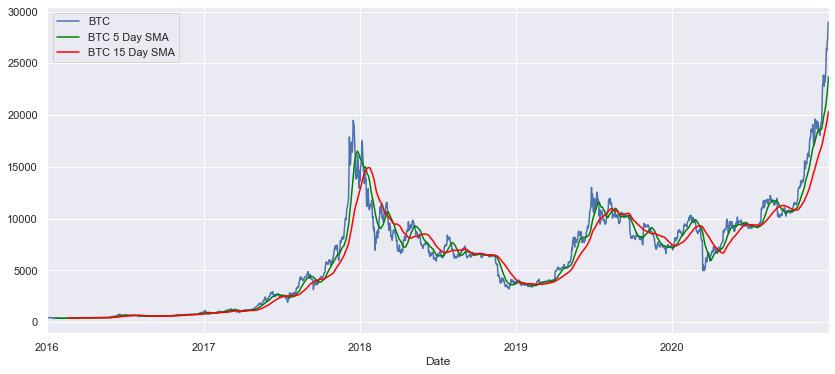

In [81]:
rolling_mean = newdf.BTC.rolling(window= 20).mean()
rolling_mean2 = newdf.BTC.rolling(window= 50).mean()
newdf.BTC.plot(figsize=(14,6),label='BTC')
rolling_mean.plot(label='BTC 5 Day SMA', color='green')
rolling_mean2.plot(label='BTC 15 Day SMA', color='red')
plt.legend(loc='upper left')
plt.show()

One example of using moving averages is following crossovers. For example, a bullish crossover occurs when the short-term SMA crosses above the long-term SMA. A bearish crossover occurs when the short-term SMA crosses below the long-term SMA.

When short-term crosses above long-term we get a buy signal. When short-term passes below the longer-term we get a sell signal.

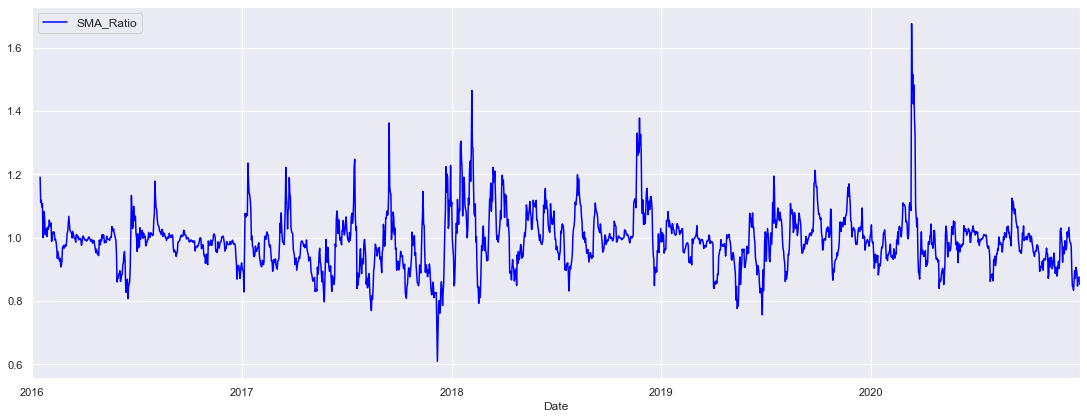

In [67]:
(rolling_mean/newdf.BTC).plot( figsize=(16,6),color = 'blue')
plt.legend(['SMA_Ratio'], ncol=3, loc = 'upper left', fontsize = 12)
plt.subplots_adjust(left=.09, bottom=.09, right=1, top=.95, wspace=.20, hspace=0)

### Exponential Moving Average (EMA)

EMA focuses more on recent data by assigning more weight to new data. The main idea behind EMA is to give preference to the recent data more than previous data. The older the data, the lesser is the weight assigned to it. Because of this, the EMA is more responsive to changes in trend compared to SMA, where all values are given equal weights

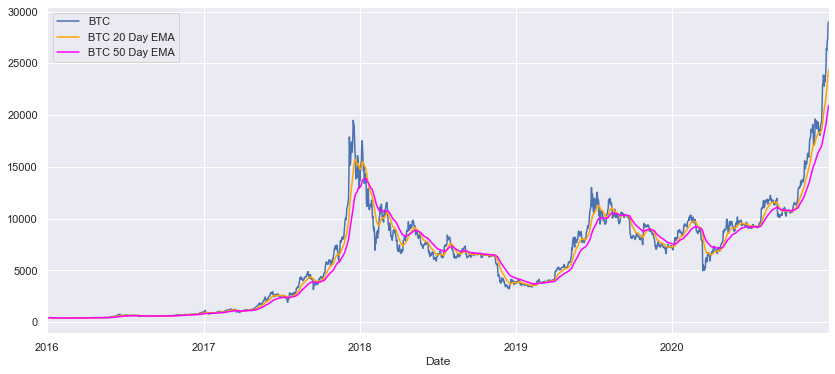

In [83]:
exp1 = newdf.BTC.ewm(span=20, adjust=False).mean()
exp2 = newdf.BTC.ewm(span=50, adjust=False).mean()
newdf.BTC.plot(figsize=(14,6),label='BTC')
exp1.plot(label='BTC 20 Day EMA', color='orange')
exp2.plot(label='BTC 50 Day EMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

## Grafici: prendo in considerazione solo il 2020

In [22]:
df_2020 = df[df.Date.dt.year >= 2020]

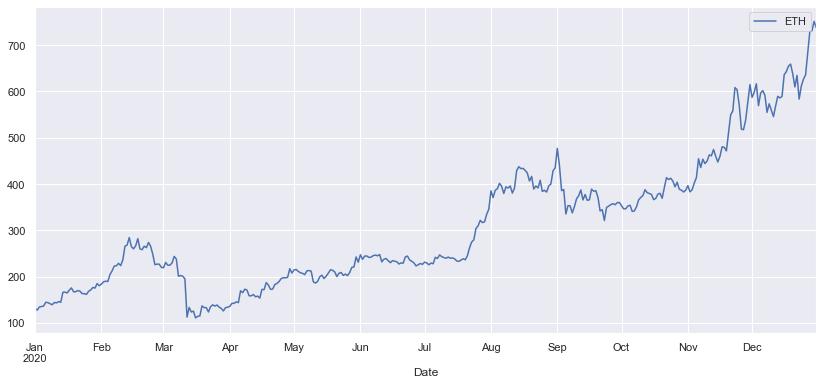

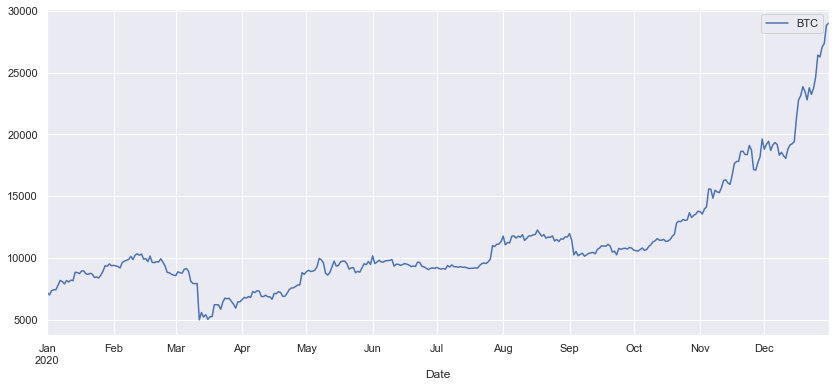

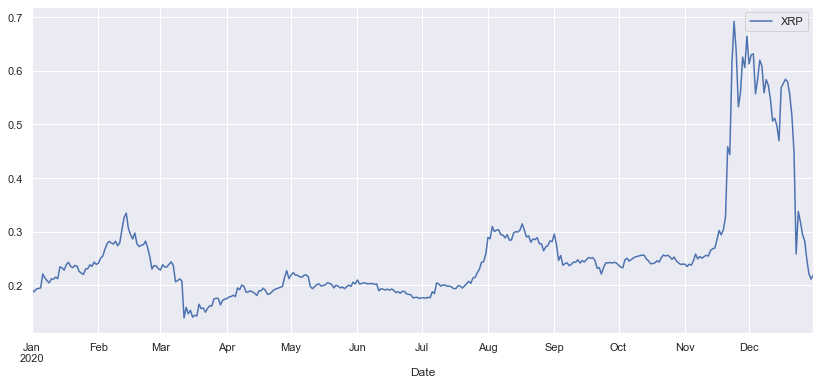

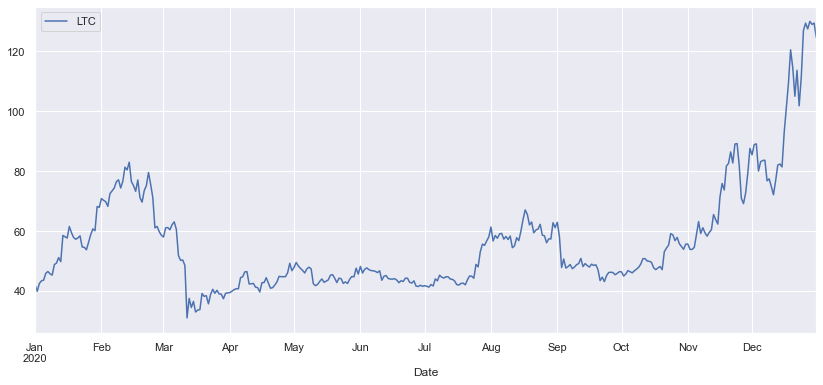

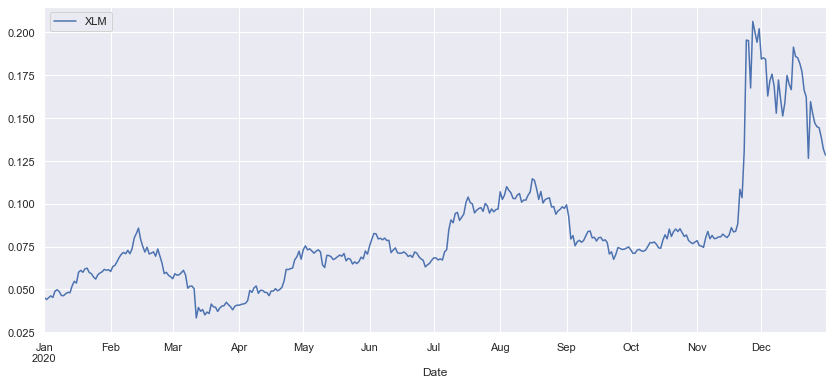

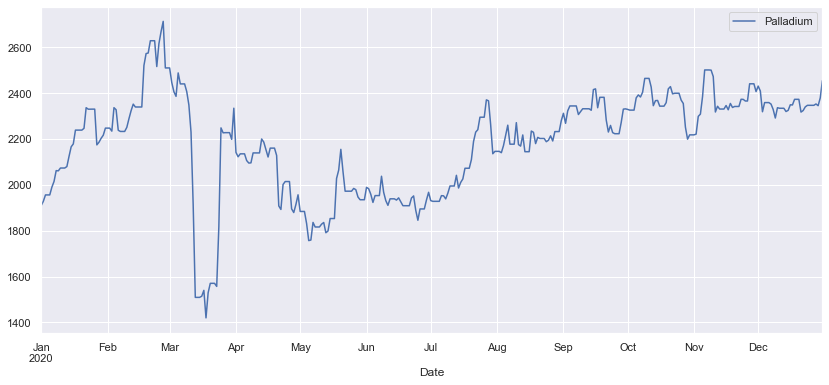

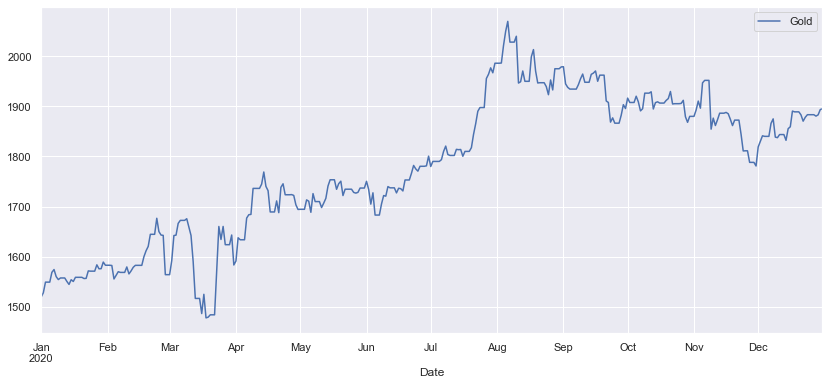

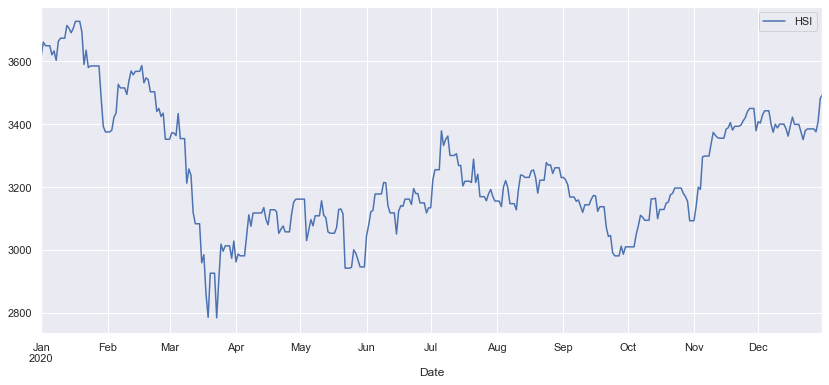

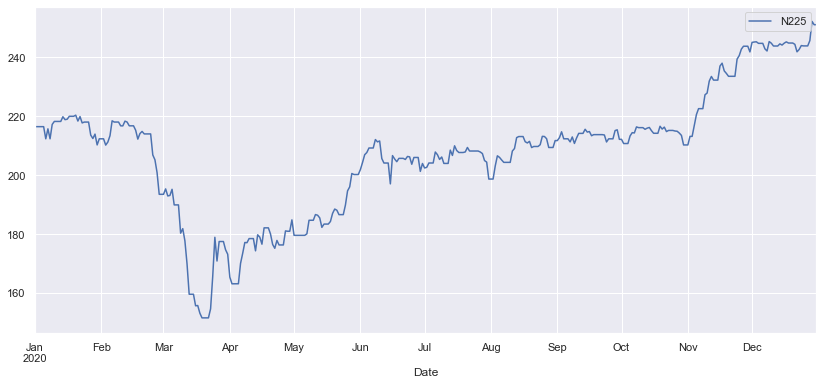

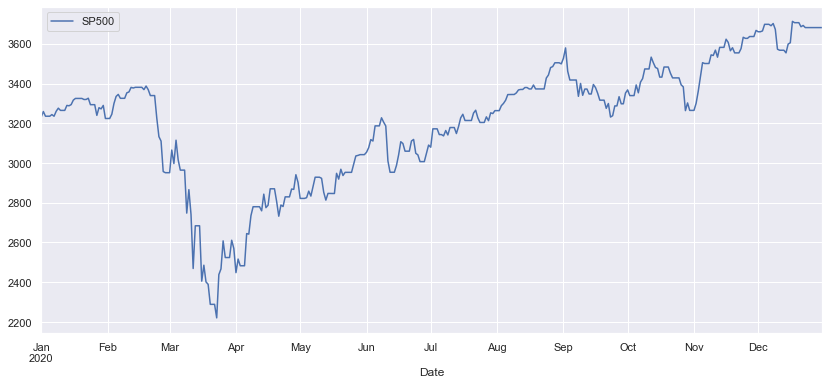

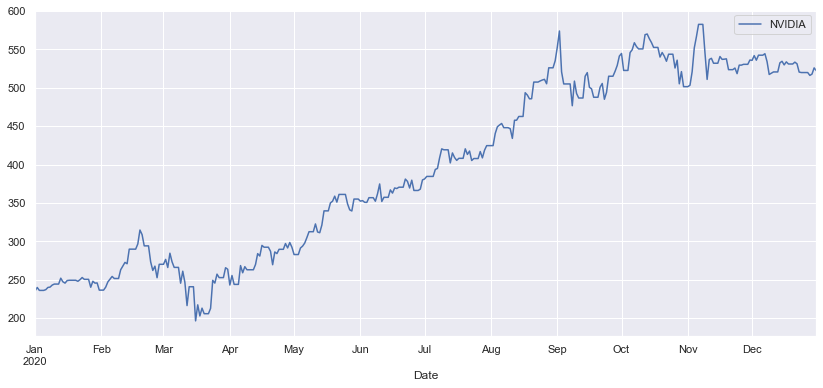

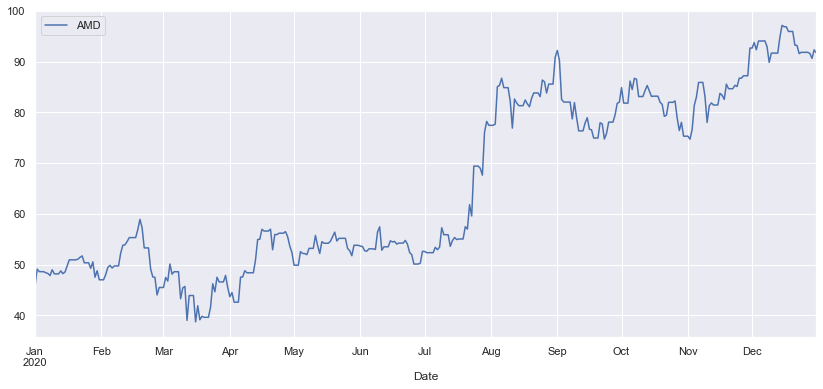

In [23]:
#take exam 2020 year
list2 = list(df_2020.columns[1:])
for i in list2:
    df_2020.plot(x='Date', y=i)

Un trend simile è riportato durante il primo anno di pandemia globale da parte di tutti gli indicatori finanziari

<AxesSubplot:xlabel='Date'>

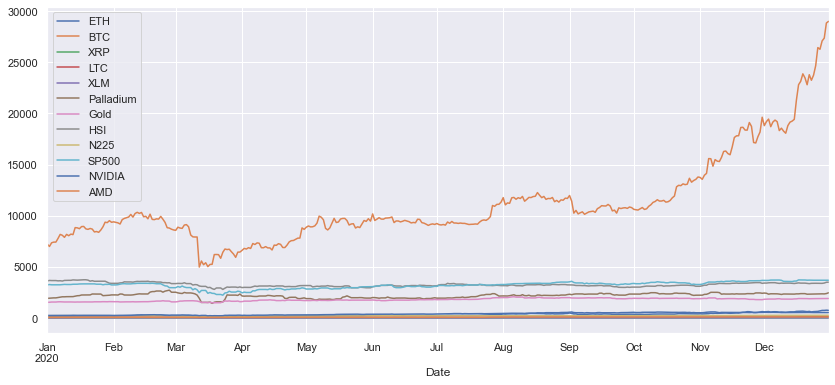

In [24]:
df_2020.plot(x='Date')

Grafico che riporta l'andamento dei vari indicatori presenti nel dataset nell' anno 2020.

## Correlazione di Pearson

Text(0.5, 1.0, 'pearson correlation map')

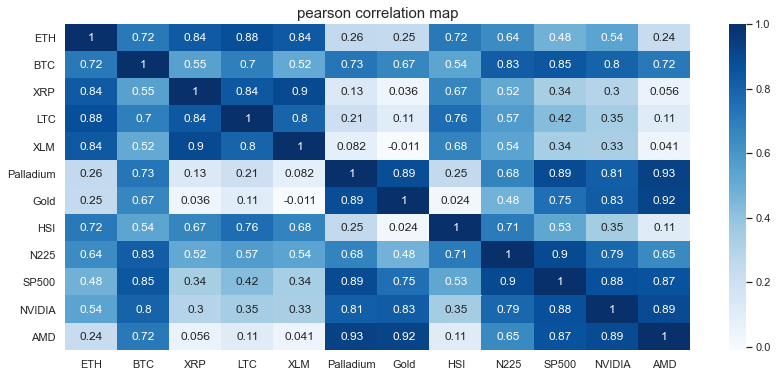

In [46]:
import seaborn as sns
#pearson correlation
data_corr = newdf.iloc[:, :].corr()
sns.set(rc={"figure.figsize":(14, 6)})
sns.heatmap(data_corr, annot=True, cmap='Blues')
plt.title("pearson correlation map", fontsize=15)



## Returns

I rendimenti nel mercato delle monete non sono altro che una variazione percentuale del prezzo.

In [25]:
#faccio una copia del dataset
df_return = newdf.copy()

In [26]:
#funzione che mi calcola (P1-P0)/P0 il ritorno rispetto al numero di righe specificate nel parametro periods
df_return = df_return.pct_change()

In [27]:
df_return = df_return.drop(df_return.index[0])


In [28]:
df_return

,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
Date,,,,,,,,,,,,
2016-01-02,-0.011498,-0.002049,0.018472,-0.002849,-0.004005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-03,0.037115,-0.007913,-0.007914,-0.005714,0.001723,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-01-04,-0.017929,0.007163,-0.009806,0.005747,0.002294,-0.031673,0.014148,-0.026799,-0.030616,-0.012921,-0.017900,-0.034843
2016-01-05,-0.004509,-0.002609,0.014434,-0.008571,-0.015446,-0.015527,0.002976,-0.006489,-0.004172,0.001294,0.016064,-0.007220
2016-01-06,0.000720,-0.006598,-0.006784,-0.005764,-0.028472,-0.057303,0.012519,-0.009812,-0.009942,-0.012825,-0.041350,-0.089091
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.073603,-0.006232,-0.039611,-0.014985,-0.014104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-28,0.069964,0.030927,-0.123944,0.019840,-0.004125,0.002515,-0.001487,-0.002726,0.007406,0.000000,-0.007215,-0.002287
2020-12-29,0.001533,0.010250,-0.108873,-0.007766,-0.038511,-0.003189,0.001330,0.009647,0.026593,0.000000,0.003353,-0.010699


## Grafico dei rendimenti

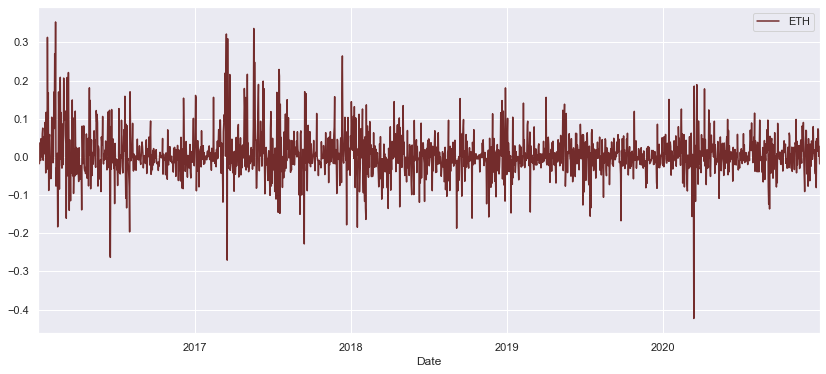

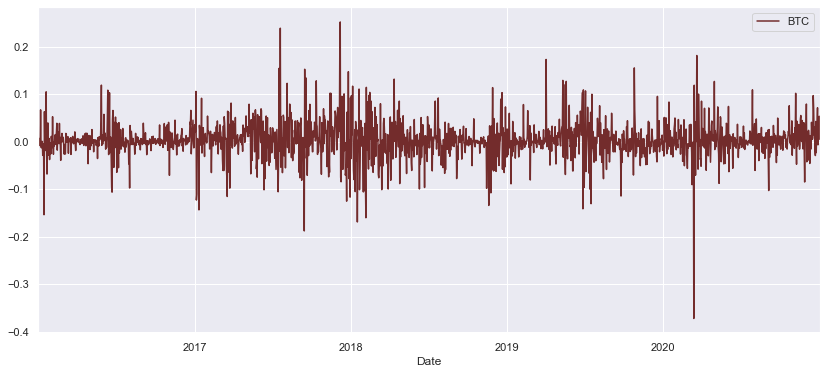

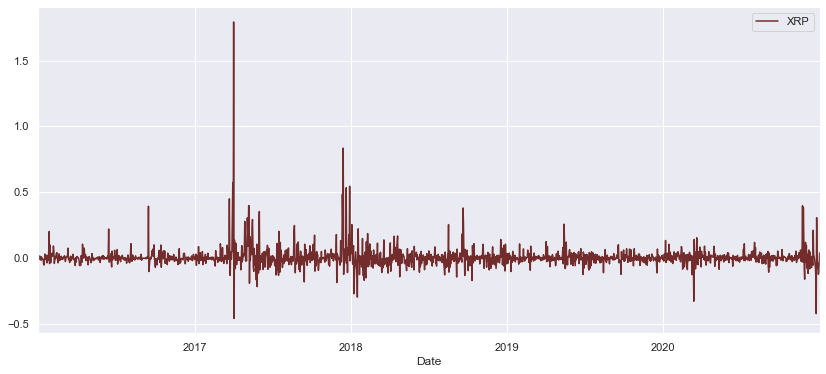

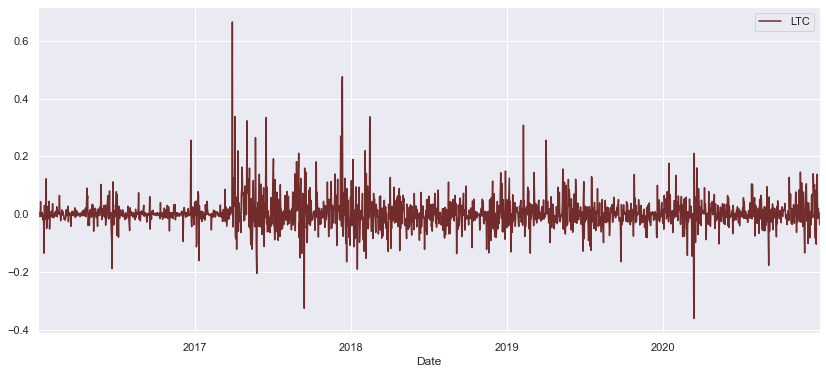

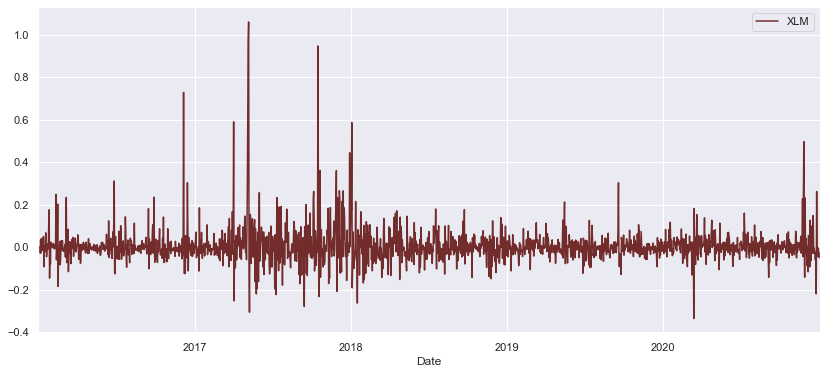

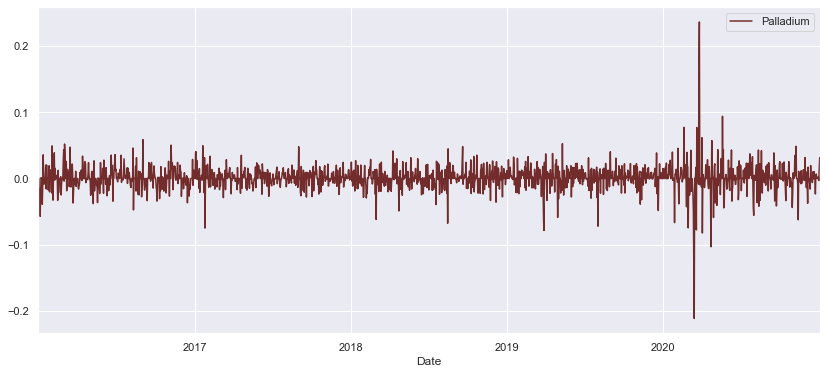

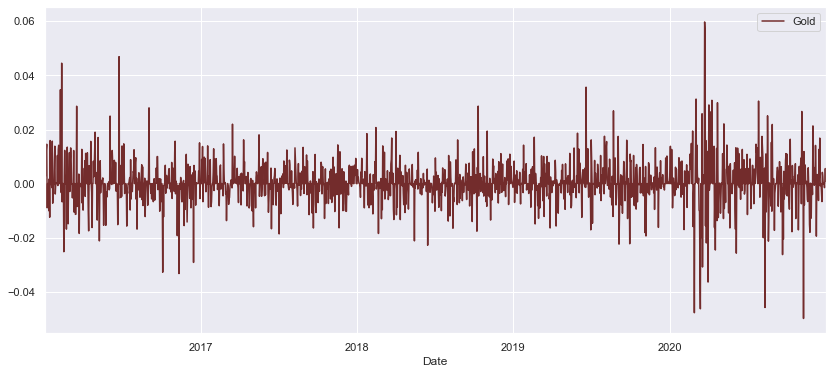

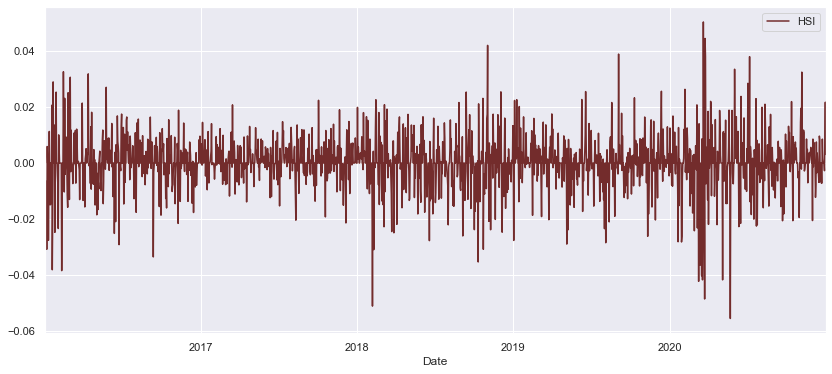

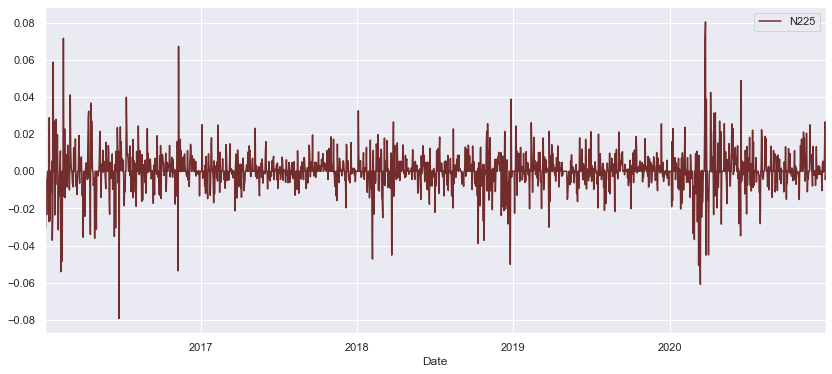

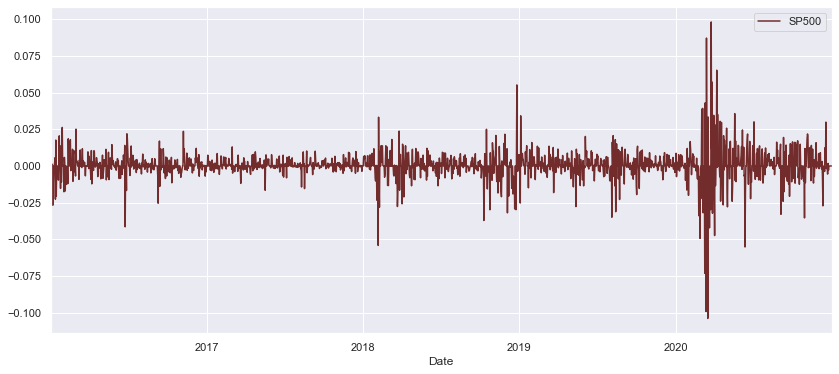

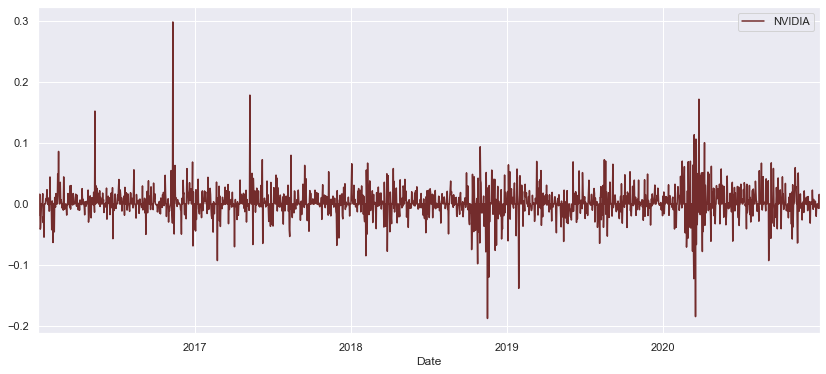

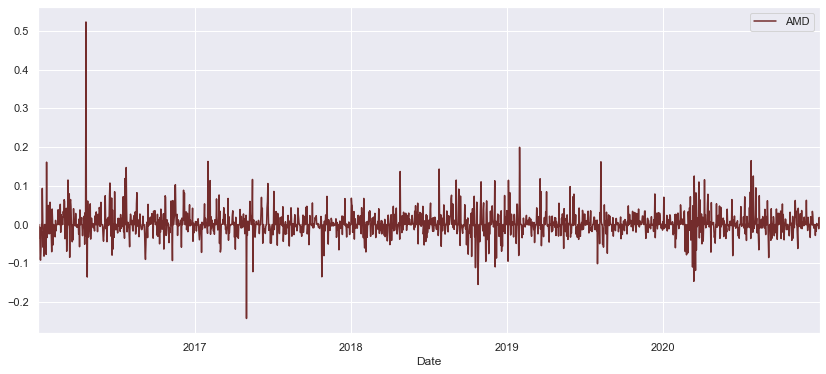

In [30]:
#solo delle criptovalute
#list_return = ['ETH','BTC','XRP','LTC','XLM']
for i in list(df_return.columns):
    
    df_return.plot( y= i , color='#732C2C')

Text(0.5, 1.0, 'pearson correlation map')

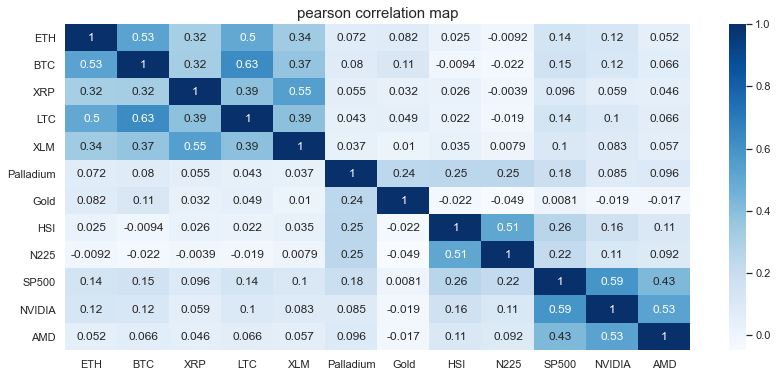

In [78]:

sns.set(rc={"figure.figsize":(14, 6)})
sns.heatmap(df_return.iloc[:, :].corr(), annot=True, cmap='Blues')
plt.title("pearson correlation map", fontsize=15)
#valori bassi nella correlazione tra return

C:\Users\monob\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


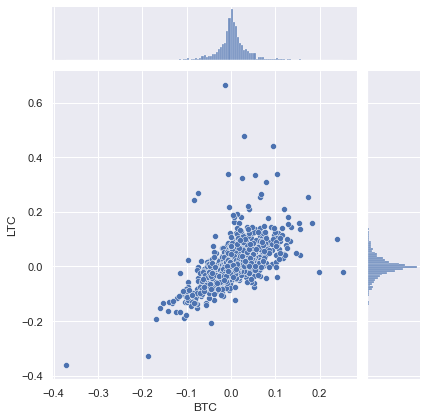

In [32]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('BTC', 'LTC', df_return, kind='scatter')

In [33]:
# Function to detect outliers in every feature
def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns = ['Feature', 'Number of Outliers'])
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            q1 = dataframe[column].quantile(0.05)
            q3 = dataframe[column].quantile(0.95)
            iqr = q3 - q1
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column, 'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(df_return)

,Feature,Number of Outliers
0,ETH,1
1,BTC,2
2,XRP,17
3,LTC,4
4,XLM,9
5,Palladium,5
6,Gold,4
7,HSI,0
8,N225,5
9,SP500,10


Numero di outliers presenti in ciascuna feature

#### Boxplot considerando anche gli outliers

<AxesSubplot:>

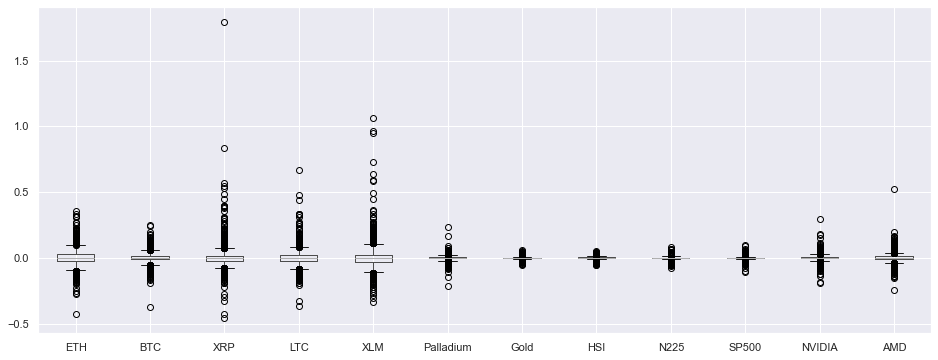

In [34]:
df_return.boxplot(figsize=(16,6))

In [35]:
#from pandas.plotting import lag_plot
#lag_plot(df_return['BTC'].tail(250))

Eliminazione degli outliers

In [36]:
#Function to treat outliers 
def treat_outliers(dataframe):
    cols = list(dataframe)
    for col in cols:
        if col in dataframe.select_dtypes(include=np.number).columns:
            dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
    
    return dataframe    


df_return2 = df_return.copy()
df_return2 = treat_outliers(df_return2)

In [37]:
detect_outliers(df_return2)

,Feature,Number of Outliers
0,ETH,0
1,BTC,0
2,XRP,0
3,LTC,0
4,XLM,0
5,Palladium,0
6,Gold,0
7,HSI,0
8,N225,0
9,SP500,0


#### Boxplot senza considerare gli outliers

<AxesSubplot:>

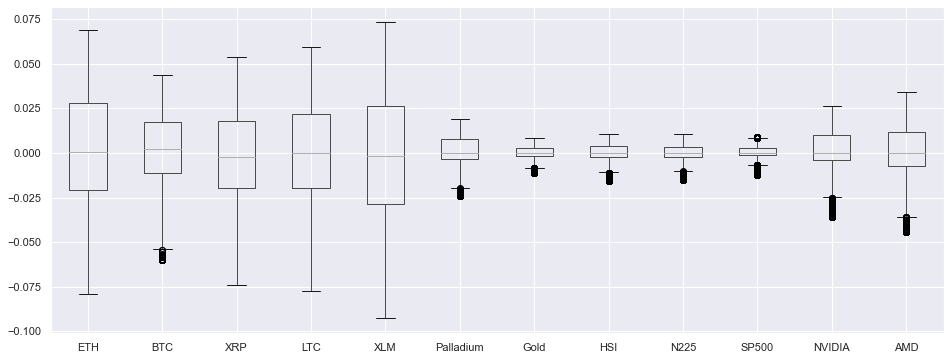

In [38]:
df_return2.boxplot(figsize=(16,6))

## Risk analysis 

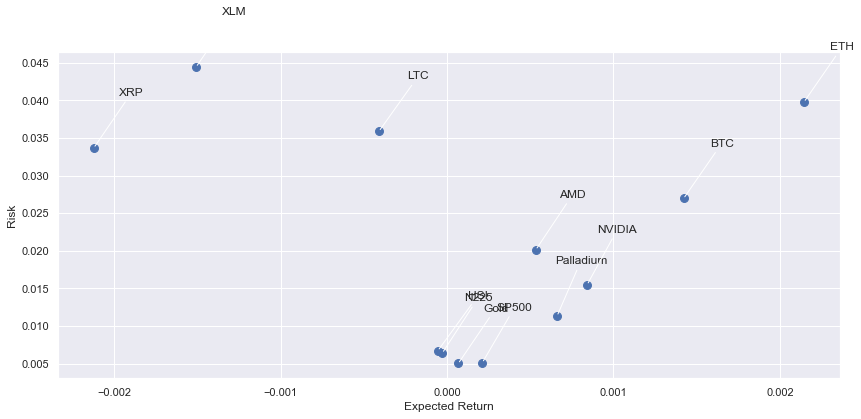

In [39]:
area=np.pi*20
plt.scatter(df_return2.mean(),df_return2.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x,y in zip(df_return2.columns,df_return2.mean(),df_return2.std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords='offset points',ha='right',va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc,rad=-0.3'))

In [40]:
df_return2.loc['2020-01-01':]

,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
Date,,,,,,,,,,,,
2020-01-01,0.009181,0.000913,-0.001177,0.016449,0.005019,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,-0.025917,-0.029819,-0.024000,-0.052356,-0.029460,0.009795,0.005660,0.010780,0.000000,0.008635,0.019592,0.034232
2020-01-03,0.053057,0.043877,0.029132,0.059302,0.025435,0.014369,0.008379,-0.003224,0.000000,-0.007241,-0.016006,-0.010183
2020-01-04,0.006708,0.008956,0.004310,0.021452,0.022947,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-05,0.008958,0.000089,0.006082,0.005077,-0.019731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,0.069164,-0.006232,-0.039611,-0.014985,-0.014104,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-12-28,0.069164,0.030927,-0.074247,0.019840,-0.004125,0.002515,-0.001487,-0.002726,0.007406,0.000000,-0.007215,-0.002287
2020-12-29,0.001533,0.010250,-0.074247,-0.007766,-0.038511,-0.003189,0.001330,0.009647,0.010554,0.000000,0.003353,-0.010699


## Risk Analysis in 2020

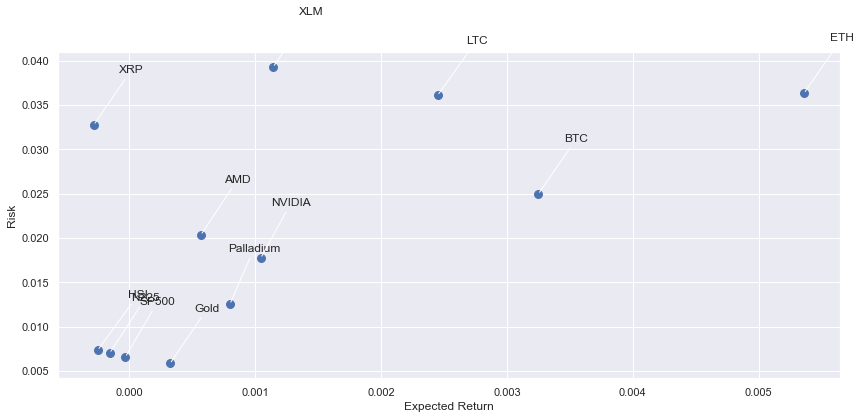

In [41]:

area=np.pi*20
plt.scatter(df_return2.loc['2020-01-01':].mean(),df_return2.loc['2020-01-01':].std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')


for label, x,y in zip(df_return2.loc['2020-01-01':].columns,df_return2.loc['2020-01-01':].mean(),df_return2.loc['2020-01-01':].std()):
    plt.annotate(
        label,
        xy=(x,y),xytext=(50,50),
        textcoords='offset points',ha='right',va='bottom',
        arrowprops=dict(arrowstyle='-',connectionstyle='arc,rad=-0.3'))

In [42]:
df_return2['Gold'].quantile(0.05)

-0.011463780166649978

-0.011 means that 95% of the times the worst daily Loss will not exceed 1.1%